In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import requests  # used later to download additional data
import sqlite3

- [`pandas` Cheat Sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)
- [`matplotlib` Cheat Sheet](https://matplotlib.org/cheatsheets/_images/cheatsheets-1.png)
- [SQL Cheat Sheet](https://www.sqltutorial.org/sql-cheat-sheet/)

# Loading the data

In [2]:
df = pd.read_csv('https://drive.switch.ch/index.php/s/UEpTFv2Bfa5C1dd/download')
df.head()

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,...,rater2,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177.0,72.0,Attacking Midfielder,1,0,...,0.50,1,1,GRC,0.326391,712.0,0.000564,0.396000,750.0,0.002696
1,john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179.0,82.0,Right Winger,1,0,...,0.75,2,2,ZMB,0.203375,40.0,0.010875,-0.204082,49.0,0.061504
2,abdon-prats,Abdón Prats,RCD Mallorca,Spain,17.12.1992,181.0,79.0,NaN,1,0,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
3,pablo-mari,Pablo Marí,RCD Mallorca,Spain,31.08.1993,191.0,87.0,Center Back,1,1,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
4,ruben-pena,Rubén Peña,Real Valladolid,Spain,18.07.1991,172.0,70.0,Right Midfielder,1,1,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002


We repeat our simple data cleaning here, by getting rid of all `NaN` values.

In [3]:
df = df.dropna()

# Task 1.1 - Scatter Plot
Create a Scatter Plot of player weight vs. height.

*Hint*: Check the [`pandas` cheat sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf) for plotting with `pandas`.

Based on the plot alone, do you think there is a correlation between the two? How can you tell from the plot?

**Bonus**: Do the same with `matplotlib`. You can find the cheat sheet for it [here](https://matplotlib.org/cheatsheets/_images/cheatsheets-1.png).

<Axes: xlabel='weight', ylabel='height'>

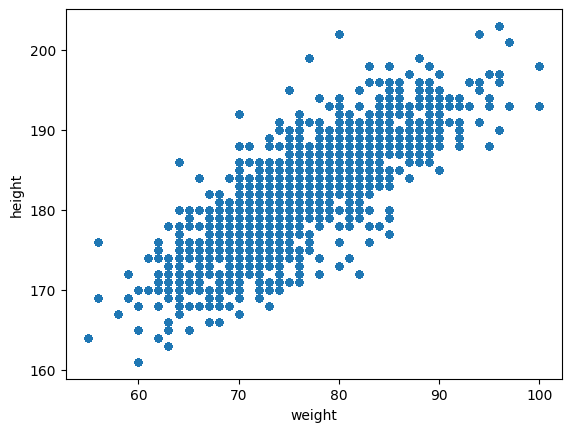

In [4]:
df.plot.scatter(x='weight', y='height')
# plt.show()

In [5]:
# selecting a column
df["height"]

0         177.0
1         179.0
5         182.0
6         187.0
7         180.0
          ...  
146022    188.0
146023    178.0
146024    190.0
146025    169.0
146027    174.0
Name: height, Length: 115457, dtype: float64

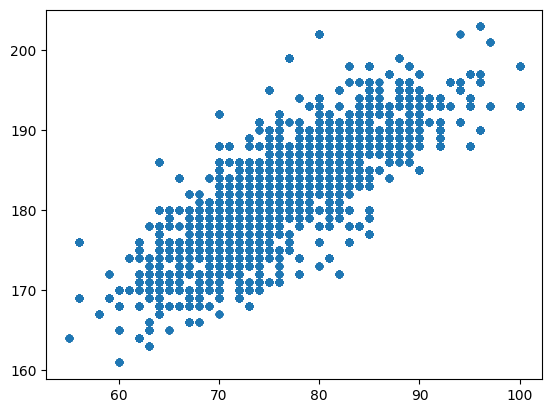

In [6]:
# now with matplotlib
plt.scatter(df['weight'], df['height'], s=18)
plt.show()

# Task 1.2 - Data Manipulation
Create a new column, called Name Length, that contains the length of the player's name.

*Hint*: Split this into two steps:

* creating a new column (check the `pandas` cheat sheet or last week's notebook if you don't remember how to do this)
* calculating the length of the player's name **for each row**
    
*Hint2*: If you have trouble with calculating the length of the player's name, have a look at the *Summarize Data* section in the cheat sheet.

In [7]:
df

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,...,rater2,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177.0,72.0,Attacking Midfielder,1,0,...,0.50,1,1,GRC,0.326391,712.0,0.000564,0.396000,750.0,0.002696
1,john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179.0,82.0,Right Winger,1,0,...,0.75,2,2,ZMB,0.203375,40.0,0.010875,-0.204082,49.0,0.061504
5,aaron-hughes,Aaron Hughes,Fulham FC,England,08.11.1979,182.0,71.0,Center Back,1,0,...,0.00,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752
6,aleksandar-kolarov,Aleksandar Kolarov,Manchester City,England,10.11.1985,187.0,80.0,Left Fullback,1,1,...,0.25,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752
7,alexander-tettey,Alexander Tettey,Norwich City,England,04.04.1986,180.0,68.0,Defensive Midfielder,1,0,...,1.00,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146022,tom-huddlestone,Tom Huddlestone,Tottenham Hotspur,England,28.12.1986,188.0,80.0,Defensive Midfielder,1,0,...,0.50,3147,21,HUN,0.376127,574.0,0.000714,0.498350,606.0,0.002968
146023,tomas-rosicky,Tomáš Rosický,Arsenal FC,England,04.10.1980,178.0,67.0,Attacking Midfielder,1,1,...,0.00,3147,21,HUN,0.376127,574.0,0.000714,0.498350,606.0,0.002968
146024,winston-reid,Winston Reid,West Ham United,England,03.07.1988,190.0,87.0,Center Back,1,0,...,0.50,3147,21,HUN,0.376127,574.0,0.000714,0.498350,606.0,0.002968
146025,xherdan-shaqiri,Xherdan Shaqiri,Bayern München,Germany,10.10.1991,169.0,72.0,Left Midfielder,1,1,...,0.25,3147,21,HUN,0.376127,574.0,0.000714,0.498350,606.0,0.002968


In [8]:
df["NameLength"] = df['player'].apply(lambda x: len(x))
df

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,...,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp,NameLength
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177.0,72.0,Attacking Midfielder,1,0,...,1,1,GRC,0.326391,712.0,0.000564,0.396000,750.0,0.002696,13
1,john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179.0,82.0,Right Winger,1,0,...,2,2,ZMB,0.203375,40.0,0.010875,-0.204082,49.0,0.061504,10
5,aaron-hughes,Aaron Hughes,Fulham FC,England,08.11.1979,182.0,71.0,Center Back,1,0,...,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,12
6,aleksandar-kolarov,Aleksandar Kolarov,Manchester City,England,10.11.1985,187.0,80.0,Left Fullback,1,1,...,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,18
7,alexander-tettey,Alexander Tettey,Norwich City,England,04.04.1986,180.0,68.0,Defensive Midfielder,1,0,...,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146022,tom-huddlestone,Tom Huddlestone,Tottenham Hotspur,England,28.12.1986,188.0,80.0,Defensive Midfielder,1,0,...,3147,21,HUN,0.376127,574.0,0.000714,0.498350,606.0,0.002968,15
146023,tomas-rosicky,Tomáš Rosický,Arsenal FC,England,04.10.1980,178.0,67.0,Attacking Midfielder,1,1,...,3147,21,HUN,0.376127,574.0,0.000714,0.498350,606.0,0.002968,13
146024,winston-reid,Winston Reid,West Ham United,England,03.07.1988,190.0,87.0,Center Back,1,0,...,3147,21,HUN,0.376127,574.0,0.000714,0.498350,606.0,0.002968,12
146025,xherdan-shaqiri,Xherdan Shaqiri,Bayern München,Germany,10.10.1991,169.0,72.0,Left Midfielder,1,1,...,3147,21,HUN,0.376127,574.0,0.000714,0.498350,606.0,0.002968,15


In [9]:
df.shape

(115457, 29)

In [10]:
df.apply(len, axis=0)

playerShort      115457
player           115457
club             115457
leagueCountry    115457
birthday         115457
height           115457
weight           115457
position         115457
games            115457
victories        115457
ties             115457
defeats          115457
goals            115457
yellowCards      115457
yellowReds       115457
redCards         115457
photoID          115457
rater1           115457
rater2           115457
refNum           115457
refCountry       115457
Alpha_3          115457
meanIAT          115457
nIAT             115457
seIAT            115457
meanExp          115457
nExp             115457
seExp            115457
NameLength       115457
dtype: int64

In [11]:
# all of these are equivalent

def foo(x):
    return len(x)

df['NameLength'] = df['player'].apply(len)
df['NameLength'] = df['player'].apply(foo)
df['NameLength'] = df['player'].apply(lambda x: len(x))
df['NameLength']

0         13
1         10
5         12
6         18
7         16
          ..
146022    15
146023    13
146024    12
146025    15
146027    14
Name: NameLength, Length: 115457, dtype: int64

# Task 1.3 - Scatter Plot
Create a Scatter Plot of player weight vs. name length. Do you see a correlation between the two? Why or why not? What makes this plot different from the one of weight vs height?

*Hint*: You can do this exactly the same way as you did in Task 1.1. Solve that task first and then this one is essentially free.

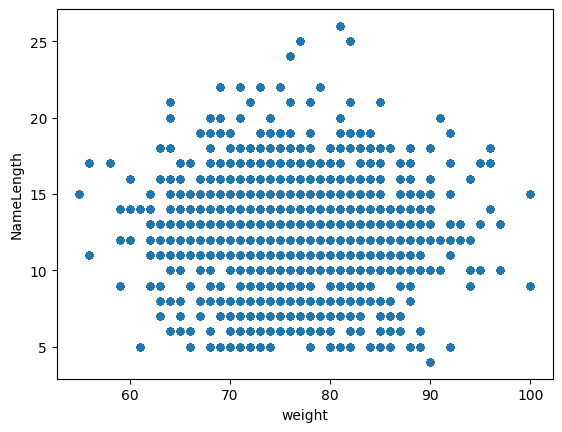

In [12]:
df.plot.scatter(x='weight', y='NameLength')
plt.show()

# Task 1.4 - Linear Regression
Create a linear regression model that predicts the player's height based on the player's weight. What is the height of a player that weighs 80kg? What is the height of a player that weighs 100kg?

*Hint 1*: For the linear regression, use [`scikit-learn` and its `LinearRegression` model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

*Hint 2*: You have to reshape your data. You can do this with the `numpy.reshape` function. Have a look at the [`reshape` function](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html) for how to continue from there.

The task of linear regression is to find the solution to the mapping:

$ f(X) = AX + b $

* `X` is the training data: usually a matrix with the features as columns and the rows the examples
* `A` is the linear mapping matrix (also called the _coefficient_)
* `b` is the offset (also called _intercept_)
* `f` is the function to map the training data to the target `y`


Note, that `X` is a matrix, however, the `weight` is a column vector, so you have to reshape it to a matrix.

Try using it first without reshaping and understand the occuring error message.

In [13]:
foo = df['weight'].values.reshape(-1, 1)
foo

array([[72.],
       [82.],
       [71.],
       ...,
       [87.],
       [72.],
       [72.]])

In [14]:
foo.shape

(115457, 1)

In [15]:
from sklearn.linear_model import LinearRegression

# X is the name of the features
# y is the name of the targets
X = df['weight'].values.reshape(-1, 1)
y = df['height'].values.reshape(-1, 1)

model = LinearRegression()
model.fit(X, y)
model.predict(
    [[80], [100]]
)

array([[184.80521209],
       [199.9036292 ]])

In [16]:
# the coefficient:
print(model.coef_)

[[0.75492086]]


In [17]:
# the intercept:
print(model.intercept_)

[124.41154362]


In [18]:
# Replay:
A = model.coef_
b = model.intercept_

def f(X):
    return A * X + b

x = np.array([[80], [100], [225000]])

preds = f(x)

print(preds)

[[   184.80521209]
 [   199.9036292 ]
 [169981.60409578]]


# Task 1.5 - Scatter Plot with Regression Line
Create a Scatter Plot of player weight vs. height. Draw the regression line into the scatter plot.

*Hint*: You can use `plt.plot` to draw the regression line. Have a look at the [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) for how to use it. If you didn't do the bonus part of Task 1.1, you can have a look at the [`matplotlib cheat sheet`](https://matplotlib.org/cheatsheets/_images/cheatsheets-1.png).

*Hint2*: You can easily find the x-axis values. How can you get the y-axis values for the regression line? You already did this in a previous task!

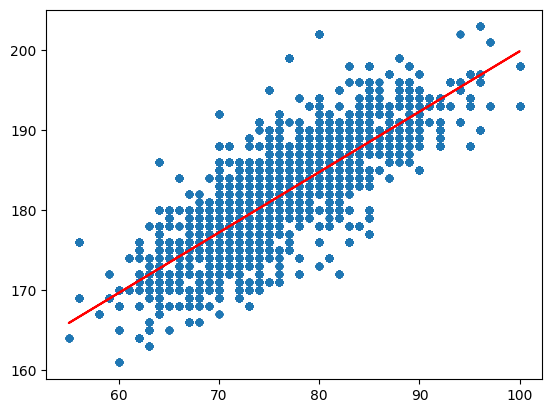

In [19]:
# draw the regression line into the scatter plot
plt.scatter(X, y, s=18)
plt.plot(X, model.predict(X), color='red')

plt.show()

**Bonus**: Repeat this for height vs. name length.

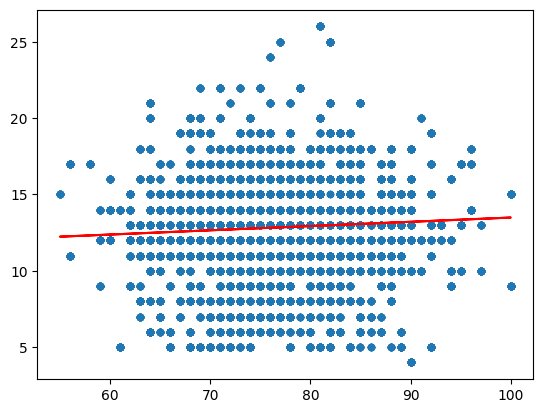

In [20]:
X = df['weight'].values.reshape(-1, 1)
y = df['NameLength'].values.reshape(-1, 1)

model = LinearRegression()
model.fit(X, y)

plt.scatter(X, y, s=18)
plt.plot(X, model.predict(X), color='red')

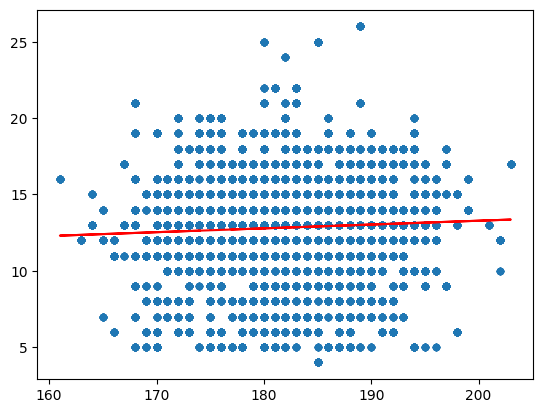

In [21]:
X = df['height'].values.reshape(-1, 1)
y = df['NameLength'].values.reshape(-1, 1)

model = LinearRegression()
model.fit(X, y)

plt.scatter(X, y, s=18)
plt.plot(X, model.predict(X), color='red')

# Task 2.1 - SQL Query on DataFrame
Write a query that returns the player's weight, height, and position from the DataFrame, using SQL.

*Hint*: You need to use the [`read_sql`](https://pandas.pydata.org/docs/reference/api/pandas.read_sql.html) function.

You can find an SQL cheat sheet [here](https://www.sqltutorial.org/sql-cheat-sheet/).

In [22]:
with sqlite3.connect('crowdstorming.db') as c:
    df.to_sql('crowdstorming', c, if_exists="replace")

In [23]:
from sqlite3 import connect
conn = connect('./crowdstorming.db')
column = "weight"
pd.read_sql(
    'SELECT player, weight, height FROM crowdstorming',
    conn
)

,player,weight,height
0,Lucas Wilchez,72.0,177.0
1,John Utaka,82.0,179.0
2,Aaron Hughes,71.0,182.0
3,Aleksandar Kolarov,80.0,187.0
4,Alexander Tettey,68.0,180.0
...,...,...,...
115452,Tom Huddlestone,80.0,188.0
115453,Tomáš Rosický,67.0,178.0
115454,Winston Reid,87.0,190.0
115455,Xherdan Shaqiri,72.0,169.0


In [24]:
from sqlite3 import connect
conn = connect('./crowdstorming.db')
column = "weight"
pd.read_sql(
    'SELECT ' + column + ' FROM crowdstorming',
    conn
)

,weight
0,72.0
1,82.0
2,71.0
3,80.0
4,68.0
...,...
115452,80.0
115453,67.0
115454,87.0
115455,72.0


We will be using [`sqlalchemy`](https://www.sqlalchemy.org/) here. First we store the data from the DataFrame in a sqlite3 database.

You can find an `sqlalchemy` cheat sheet [here](https://www.pythonsheets.com/notes/python-sqlalchemy.html).

In [25]:
import sqlite3
with sqlite3.connect('crowdstorming.db') as c:
    df.to_sql('crowdstorming', c, if_exists="replace")

from sqlalchemy import create_engine, MetaData

engine = create_engine('sqlite:///crowdstorming.db')
metadata = MetaData()
metadata.reflect(engine)

table_names = metadata.tables.keys()
print(table_names)

dict_keys(['countries', 'crowdstorming'])


In [26]:
from sqlalchemy.orm import sessionmaker

metadata = MetaData()
metadata.reflect(engine)
countries_table = metadata.tables['countries']
crowdstorming_table = metadata.tables['crowdstorming']
Session = sessionmaker(bind=engine)
session = Session()
results = session.query(
    crowdstorming_table.c.player, 
    crowdstorming_table.c.weight, 
    crowdstorming_table.c.height
).all()
print(results[:5])

[('Lucas Wilchez', 72.0, 177.0), ('John Utaka', 82.0, 179.0), ('Aaron Hughes', 71.0, 182.0), ('Aleksandar Kolarov', 80.0, 187.0), ('Alexander Tettey', 68.0, 180.0)]
